In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd

In [15]:
path='../Dataset'
for files in os.listdir(path):
    full_path=os.path.join(path,files)
    print(full_path)
    df=pd.read_csv(full_path)
    print(f'Head of {files} is:\n{df.head()}')

../Dataset\beach.csv
Head of beach.csv is:
  idbeach;"name";"city";"state";"country";"latitude";"longitude"
0  368;"Barra da Lagoa";"Florianopolis";"Santa Ca...            
1  369;"Joaquina";"Florianopolis";"Santa Catarina...            
2  370;"Mole";"Florianopolis";"Santa Catarina";"B...            
3  371;"Ingleses";"Florianopolis";"Santa Catarina...            
4  372;"Brava";"Florianopolis";"Santa Catarina";"...            
../Dataset\day_forecast.csv
Head of day_forecast.csv is:
  iddayforecast;"date";"sunrise";"sunset";"moonset";"moonrise";"moon_phase";"moon_illumination";"maxtemp";"mintemp";"idbeach"
0  334;"2020-02-25";"06:04 AM";"06:50 PM";"07:36 ...                                                                         
1  459;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
2  460;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
3  461

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

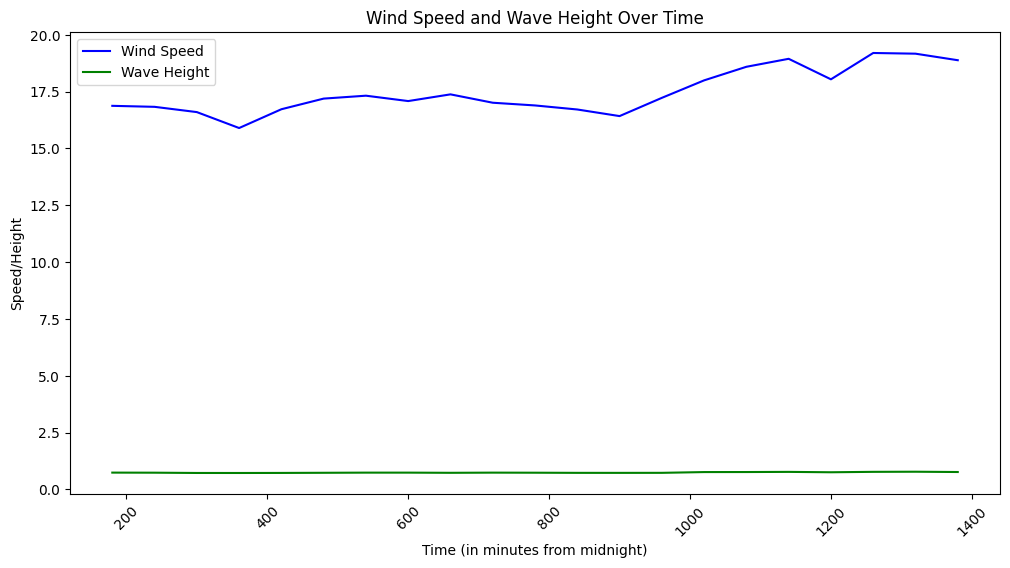

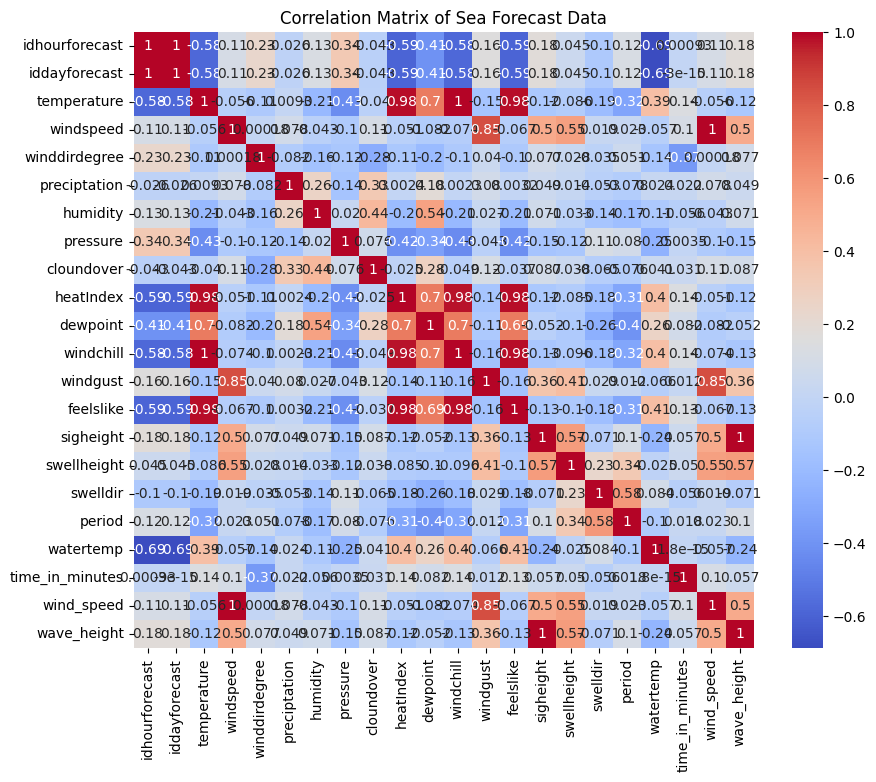

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')

# Convert the 'time' column to proper datetime and extract the time part in minutes
hour_forecast_data['time_in_minutes'] = pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.hour * 60 + pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.minute

# Remove the original 'time' column since we can't use it for correlation
hour_forecast_data = hour_forecast_data.drop(columns=['time'])

# Rename columns for clarity
hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

# Group by time_in_minutes to check average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time_in_minutes').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

# Plot the wind speed and wave height over time (in minutes from midnight)
plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time (in minutes from midnight)')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation analysis between different metrics (excluding time column)
plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()


Beach Data:
   idbeach            name           city           state country   latitude  \
0      368  Barra da Lagoa  Florianopolis  Santa Catarina  Brasil -27.572289   
1      369        Joaquina  Florianopolis  Santa Catarina  Brasil -27.629725   
2      370            Mole  Florianopolis  Santa Catarina  Brasil -27.602851   
3      371        Ingleses  Florianopolis  Santa Catarina  Brasil -27.423397   
4      372           Brava  Florianopolis  Santa Catarina  Brasil -27.399194   

   longitude  
0 -48.428124  
1 -48.450798  
2 -48.435063  
3 -48.401169  
4 -48.413608  

Day Forecast Data:
   iddayforecast       date  sunrise   sunset  moonset moonrise  \
0            334  2/25/2020  6:04 AM  6:50 PM  7:36 AM  8:16 PM   
1            459   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
2            460   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
3            461   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
4            462   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 A

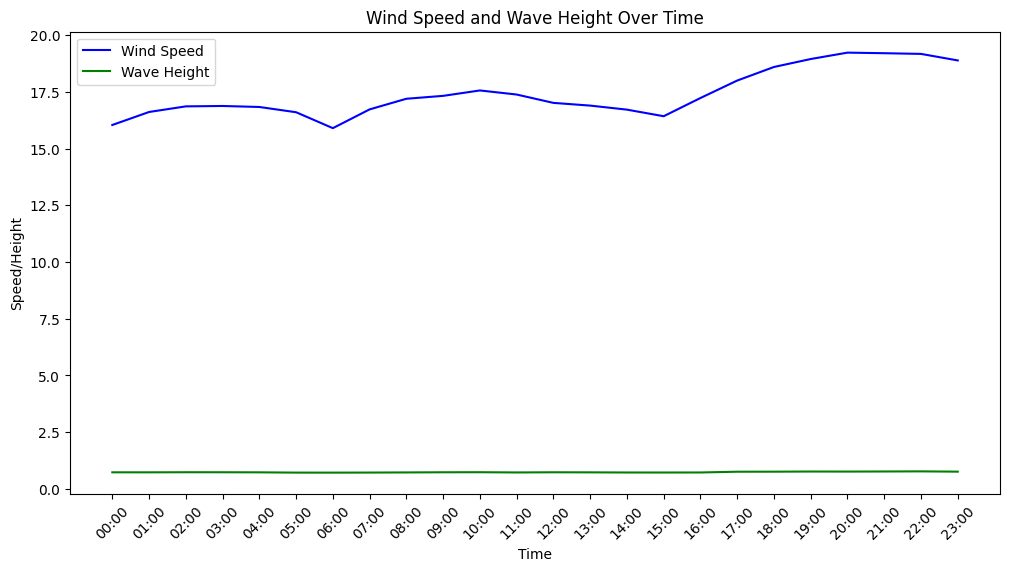

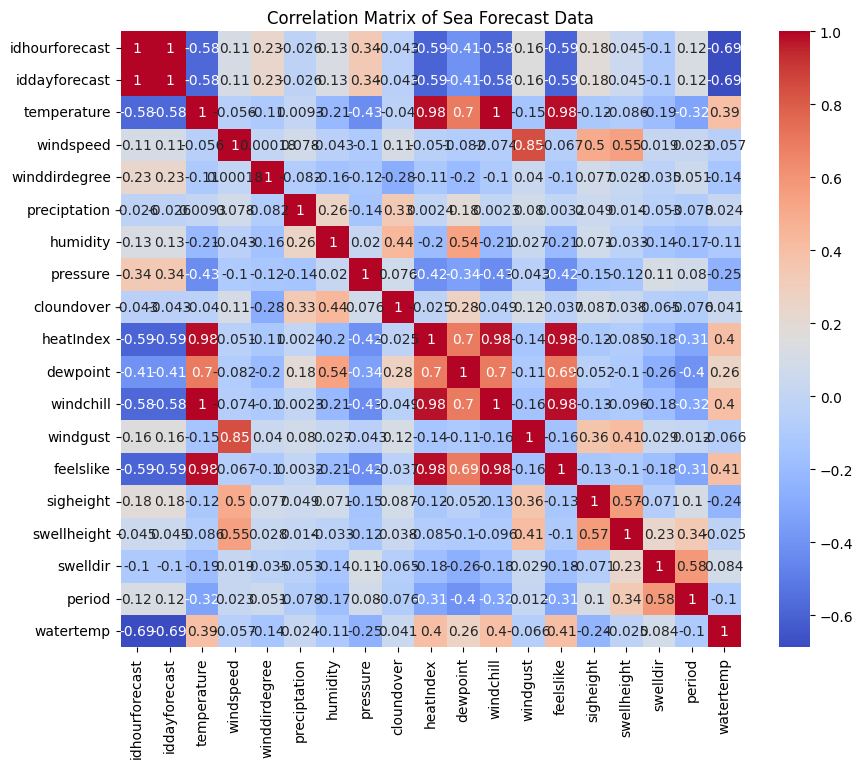

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')
sea_condition_fact_data = pd.read_csv('../Dataset/sea_condition_fact.csv')
spot_data = pd.read_csv('../Dataset/spot.csv')
tide_data = pd.read_csv('../Dataset/tide.csv')

print("Beach Data:")
print(beach_data.head())

print("\nDay Forecast Data:")
print(day_forecast_data.head())

print("\nHour Forecast Data:")
print(hour_forecast_data.head())

print("\nMissing values in Hour Forecast Data:")
print(hour_forecast_data.isnull().sum())



hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

print("\nHour Forecast Data after formatting time:")
print(hour_forecast_data[['time', 'temperature', 'windspeed', 'winddirdegree']].head())

hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()

In [72]:
import pandas as pd
import numpy as np
import lightningchart as lc

# Set the license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)

hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()


chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Number of Earthquakes Over Time'
)

line_series = chart.add_line_series()
line_series.set_name('Wind Speed')
line_series.set_line_color(lc.Color(0, 0, 255))
line_series.set_line_thickness(2)

line_series = chart.add_line_series()
line_series.set_name('Wave Height')
line_series.set_line_color(lc.Color(0, 255, 0))
line_series.set_line_thickness(2)

line_series.append_samples(    
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

line_series.append_samples(
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_interval(0, 24)
x_axis.set_tick_strategy('Time')

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

chart.open()

127.0.0.1 - - [15/Sep/2024 10:27:16] "GET / HTTP/1.1" 200 -


In [88]:
import pandas as pd
import lightningchart as lc

# Set up your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)


# Group by time to calculate the average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()

grouped_hour_data['time_in_milliseconds'] = grouped_hour_data['time']/100*3600*1000

# Initialize the LightningChart for line chart visualization
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Wind Speed and Wave Height Over Time'
)

# Add wind speed line series
wind_speed_series = chart.add_line_series()
wind_speed_series.set_name('Wind Speed')
wind_speed_series.set_line_color(lc.Color(0, 0, 255))  # Blue color
wind_speed_series.set_line_thickness(2)

# Add wave height line series
wave_height_series = chart.add_line_series()
wave_height_series.set_name('Wave Height')
wave_height_series.set_line_color(lc.Color(0, 255, 0))  # Green color
wave_height_series.set_line_thickness(2)

# Add data to both series
wind_speed_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

wave_height_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

# Customize X-axis with Time TickStrategy
x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_tick_strategy(strategy="Time")  # Using Time strategy, assuming time starts at 00:00

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

# Open the chart
chart.open()


127.0.0.1 - - [15/Sep/2024 11:04:57] "GET / HTTP/1.1" 200 -


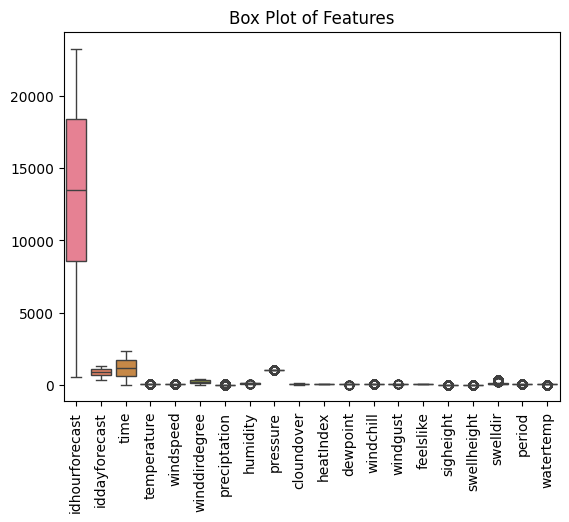

In [3]:
import pandas as pd
import numpy as np
import lightningchart as lc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt

hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')

merged_data = pd.merge(hour_forecast_data, day_forecast_data[['iddayforecast', 'idbeach']], on='iddayforecast')


sns.boxplot(data=hour_forecast_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()


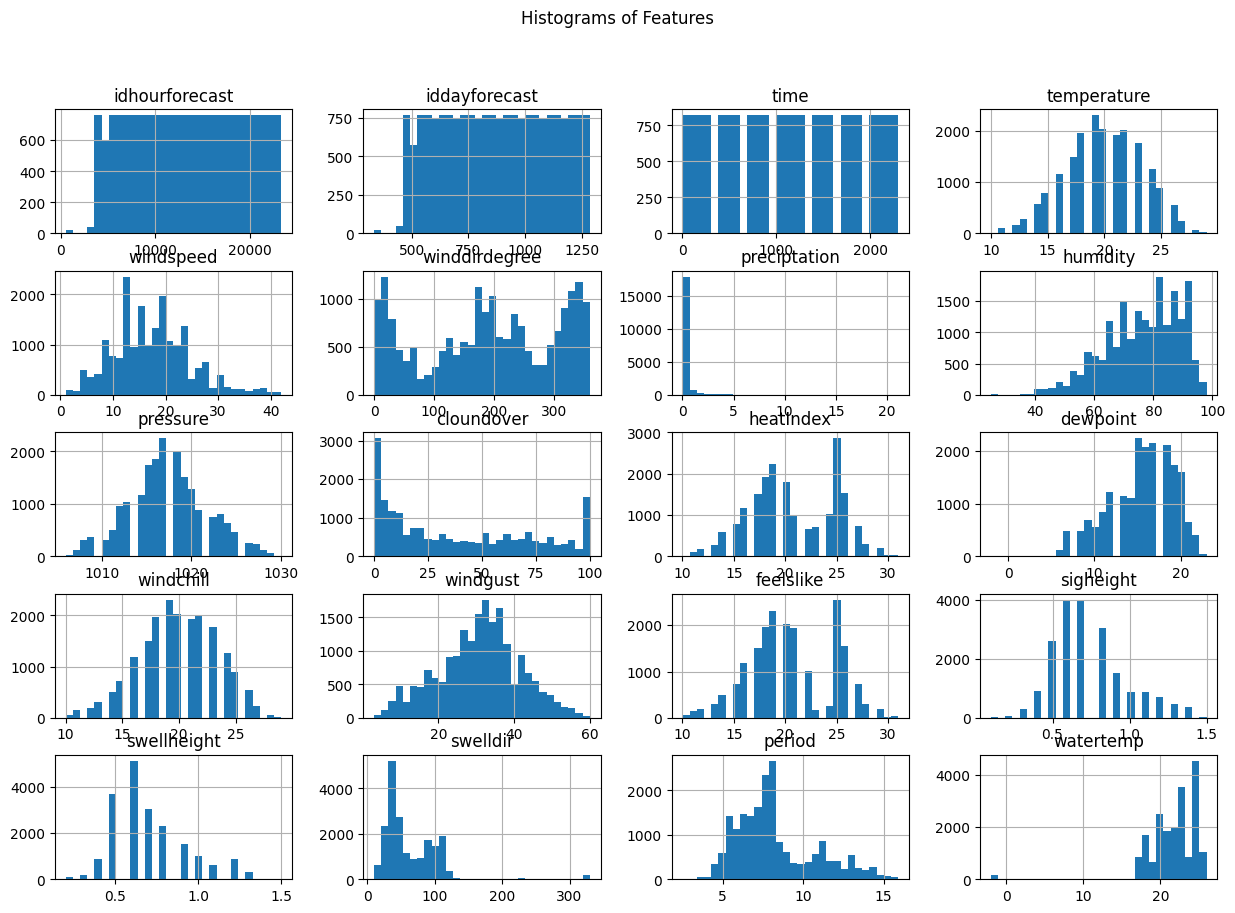

In [5]:
hour_forecast_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


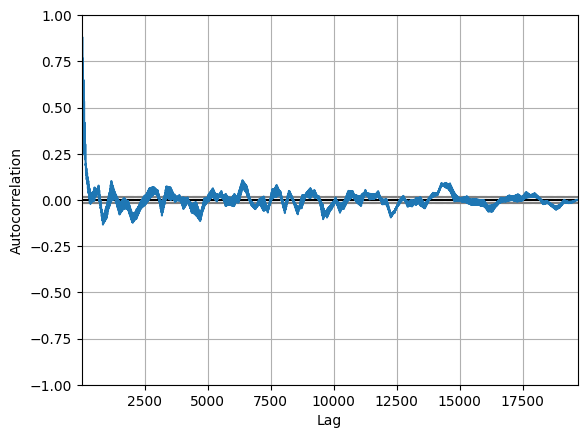

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(hour_forecast_data['windspeed'])
plt.show()


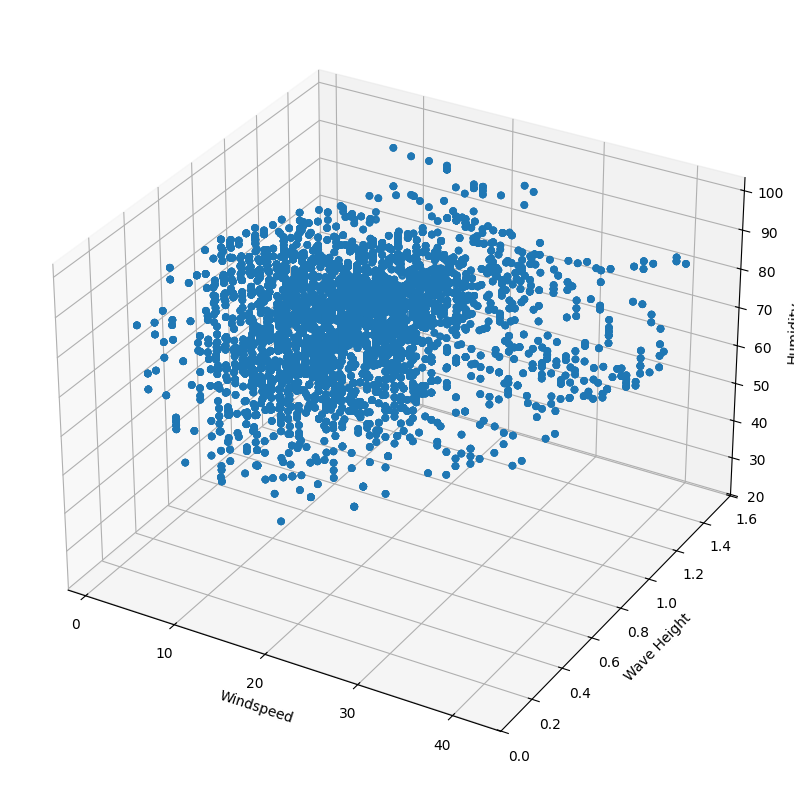

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hour_forecast_data['windspeed'], hour_forecast_data['sigheight'], hour_forecast_data['humidity'])
ax.set_xlabel('Windspeed')
ax.set_ylabel('Wave Height')
ax.set_zlabel('Humidity')
fig.set_size_inches(10, 10)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'  # replace with your actual file path
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

# Select the features and the target
features = ['idhourforecast', 'iddayforecast', 'time', 'temperature', 'windspeed', 
            'winddirdegree', 'preciptation', 'humidity', 'pressure', 'cloundover', 
            'heatIndex', 'dewpoint', 'windchill', 'windgust', 'feelslike', 'swellheight', 
            'swelldir', 'period', 'watertemp']

# Bin 'sigheight' into categories
# You can adjust the number of bins and their ranges depending on the distribution of your data
bins = [0, 0.5, 1.0, 1.5]  # You can modify the bin boundaries
labels = ['Low', 'Moderate', 'High']  # Label the categories

# Create the binned target variable
data['sigheight_category'] = pd.cut(data['sigheight'], bins=bins, labels=labels, include_lowest=True)

# Select the features and the new binned target
X = data[features]
y = data['sigheight_category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gaussian Naive Bayes model on the binned data
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_scaled)

# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


   idhourforecast  iddayforecast  time  temperature  windspeed  winddirdegree  \
0             494            334     0           23         26             10   
1             495            334   100           23         27            126   
2             496            334   200           23         27            242   
3             497            334   300           23         27            357   
4             498            334   400           23         26            354   

   preciptation  humidity  pressure  cloundover  heatIndex  dewpoint  \
0           0.8        89      1013         100         25        21   
1           1.0        90      1013         100         25        21   
2           1.3        91      1012         100         25        21   
3           1.5        91      1011         100         25        21   
4           1.0        90      1011          92         25        21   

   windchill  windgust  feelslike  sigheight  swellheight  swelldir  period  \
0

In [5]:
# Binning the 'sigheight' column into categories
bins = [0, 1, 2, 3, 4, 5]  # Adjust the bins according to your domain knowledge
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
data['sigheight_category'] = pd.cut(data['sigheight'], bins=bins, labels=labels, include_lowest=True)

# Select features and new categorical target
X = data[features]
y = data['sigheight_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes on the binned categories
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict categories
y_pred = gnb.predict(X_test_scaled)

# Evaluate the results
print("Classification Report for Categories:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


Classification Report for Categories:
              precision    recall  f1-score   support

         Low       0.55      0.54      0.54       743
    Very Low       0.93      0.94      0.94      5161

    accuracy                           0.89      5904
   macro avg       0.74      0.74      0.74      5904
weighted avg       0.89      0.89      0.89      5904

Accuracy Score: 0.8868563685636857


In [1]:
import lightningchart as lc
import pandas as pd
import numpy as np
import random
import time

# Set your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

chart = lc.Chart3D(theme=lc.Themes.White, title='Scrolling 3D surface')
chart.open(live=True)
axis = chart.get_default_x_axis()
axis.set_scroll_strategy('progressive')
axis.set_tick_strategy('Numeric')
axis.set_interval(start=-99, end=0)
surface = chart.add_surface_scrolling_grid_series(columns=100, rows=100, scroll_dimension='columns')
surface.set_min_max_palette_colors(
    min_value=-50,
    max_value=50,
    min_color=lc.Color('#00ffff'),
    max_color=lc.Color('#ffff00'),
    look_up_property='y'
)
surface.set_wireframe_stroke(1, color=lc.Color(0, 0, 0, 255))

i = 0
x = 0
while i < 1000:
    i += 1
    x = x + (random.random() * 2) - 1
    datagrid = [[x + random.uniform(0, 1) for j in range(100)]]
    datagrid[0][0] = datagrid[0][-1] = x - 3
    surface.add_values(datagrid)
    time.sleep(0.01)

chart.close()

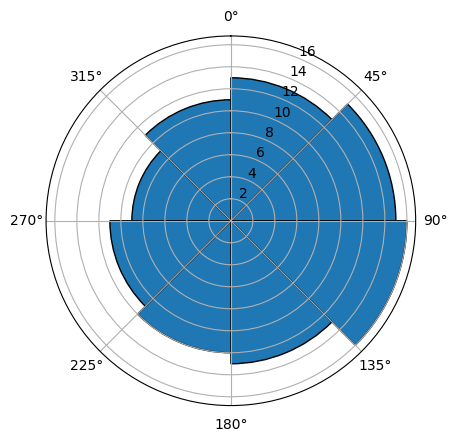

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example wind directions in degrees
wind_degrees = np.random.rand(100) * 360  # Random wind directions

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
hist, bins = np.histogram(wind_degrees, bins=np.arange(0, 360 + 45, 45))
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center * np.pi / 180, hist, align='center', width=np.deg2rad(45), edgecolor='black')
ax.set_theta_zero_location('N')  # Set 0 degrees to the North
ax.set_theta_direction(-1)  # Clockwise

plt.show()


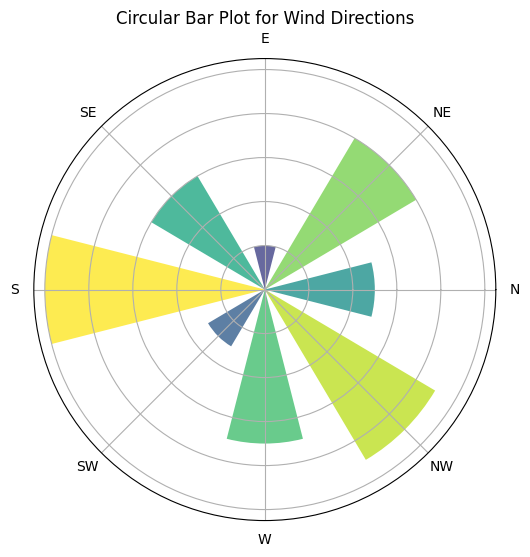

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']  # Directions
values = [5, 8, 2, 6, 10, 3, 7, 9]  # Wind speed values or frequency

# Number of categories (directions)
num_vars = len(categories)

# Compute angle of each bar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first value to close the circle
values += values[:1]
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw bars
bars = ax.bar(angles[:-1], values[:-1], width=0.5, bottom=0)

# Set the direction names
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set the radius labels
ax.set_yticklabels([])

# Add color to the bars based on the values
for bar, value in zip(bars, values[:-1]):
    bar.set_facecolor(plt.cm.viridis(value / max(values)))
    bar.set_alpha(0.8)

# Set the title
plt.title('Circular Bar Plot for Wind Directions')

plt.show()


In [7]:
import lightningchart as lc
import numpy as np
import pandas as pd

# Set your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

chart = lc.SpiderChart(
    theme=lc.Themes.Dark,
    title='Wind Direction Visualization'
)

# Set the web mode to 'circle' for a circular spider chart
chart.set_web_mode('circle')

# Define wind direction (cardinal directions) and wind speed
wind_directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
wind_speeds_1 = [12, 14, 18, 20, 17, 15, 11, 10]  # Example data for Series 1

# Add the first series (for example, morning wind speeds)
series1 = chart.add_series()
series1.add_points([{'axis': direction, 'value': speed} for direction, speed in zip(wind_directions, wind_speeds_1)])
series1.set_name('Morning Winds')

# # Add the second series (for example, afternoon wind speeds)
# series2 = chart.add_series()
# series2.add_points([{'axis': direction, 'value': speed} for direction, speed in zip(wind_directions, wind_speeds_2)])
# series2.set_name('Afternoon Winds')

# Open the chart
chart.open()

127.0.0.1 - - [16/Sep/2024 13:06:38] "GET / HTTP/1.1" 200 -
